## Model validation

To understand how well the model works within human agreement. A test dataset of images was annotated. Since here 3D data is analysed objects from three different Z-layers were annotated. 

Using the model the image will be predicted and compared to the human annotation. Out of this comparison true positive (tp), true negative (tn), false positive (fp), and false negative (fn) pixel counts will be computed. This pixel counts will then be used to calculate different performance scores (accuracy, precision, recall, F1-score, and jaccard index).

In [1]:
import apoc
import matplotlib.pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle

from the_segmentation_game import metrics

In [2]:
# Load the classifier
quapos_lm = apoc.ObjectSegmenter(opencl_filename="02-quapos-lm.cl")

# Show if correctly loaded
quapos_lm.feature_importances()

{'gaussian_blur=1': 0.32557488170342097,
 'difference_of_gaussian=1': 0.4231073391932076,
 'laplace_box_of_gaussian_blur=1': 0.25131777910337144}

### Show image, prediction, and ground truth

An example image from the test dataset will be oppened, predicted and shown next to the ground truth annotation.

Text(0.5, 1.0, 'Ground Truth')

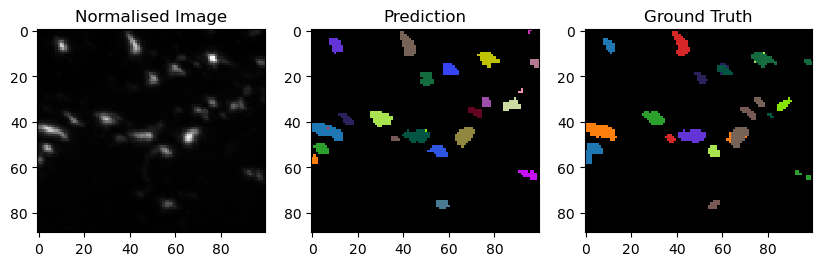

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

image = cle.imread("../data/02-data-for-pixel-classifier/test-data/d-images-for-validation/e2.tif")
cle.imshow(image, plot=axs[0])
axs[0].set_title("Normalised Image")

prediction = quapos_lm.predict(image)
cle.imshow(prediction, plot=axs[1], labels=True)
axs[1].set_title("Prediction")

ground_truth = cle.imread("../data/02-data-for-pixel-classifier/test-data/e-annotation-ground-truth-person-a/e2.tif")
cle.imshow(ground_truth, plot=axs[2], labels=True)
axs[2].set_title("Ground Truth")

### Extracting annotated Z-layers from the ground truth

Since not all layers were annotated from the ground truth dataset. Only the annotated Z-layers can be retrieved and visualised.

In [4]:
# A for-loop will be itterated over the Z-axis of the ground truth
for z_layer in range(0, image.shape[0]):
    
    # Only process when Z-layer was annotated
    if np.max(ground_truth[z_layer, ...]) > 0:
        
        # Print the number of the annotated Z-layer
        print("Z-layer:", z_layer)

3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
Z-layer: 10
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
Z-layer: 15
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
Z-layer: 20
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens
3 2 lens


Only the layers 10, 15, and 20 were annotated. Now layer 15 for example can be visualised next to layer 15 of prediction and image.

3 2 lens
3 2 lens
3 2 lens


Text(0.5, 1.0, 'Ground Truth [15]')

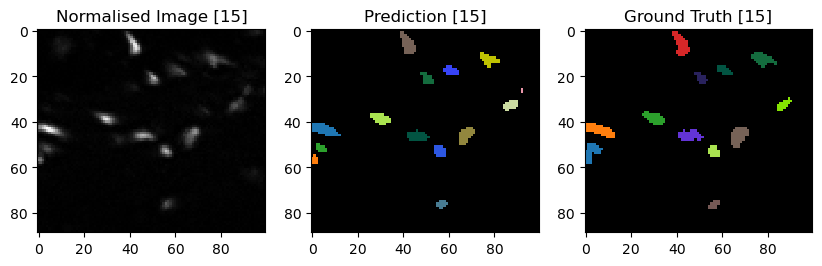

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

cle.imshow(image[15, ...], plot=axs[0])
axs[0].set_title("Normalised Image [15]")

cle.imshow(prediction[15, ...], plot=axs[1], labels=True)
axs[1].set_title("Prediction [15]")

cle.imshow(ground_truth[15, ...], plot=axs[2], labels=True)
axs[2].set_title("Ground Truth [15]")

### Compute confusion matrix at Z-layer 15

Now at layer 15 the tp, tn, fp, and fn values can be computed with the `metrics` function from `the_segmentation_game` function.

In [6]:
confusion_matrix = metrics.compute_tp_tn_fp_fn(reference_label_image=ground_truth[15, ...],
                                               test_label_image=prediction[15, ...])
confusion_matrix

3 2 lens
3 2 lens


(343.0, 8460.0, 22.0, 75.0)

The Z-layer shows the following characteristics:

- true positive: 343
- true negative: 8460
- false positive: 22
- false negative: 75

Out of these values different metrics can be calculated:

$accuracy = \frac{tp + tn}{sum\_of\_pixels}$

$precision = \frac{tp}{tp + fp}$

$recall = \frac{tp}{tp + fn}$

$F\_One\_Score = 2 * \frac{precision * recall}{precision + recall}$

$Jaccard\_Index = \frac{tp}{tp + fp + fn}$

In [7]:
# Calculate accuracy
accuracy = (confusion_matrix[0] + confusion_matrix[1]) / sum(confusion_matrix)
print("Accuracy:", accuracy)

# Calclate precision
precision = (confusion_matrix[0]) / (confusion_matrix[0] + confusion_matrix[2])
print("Precision:", precision)

# Calculate recall
recall = (confusion_matrix[0]) / (confusion_matrix[0] + confusion_matrix[3])
print("Recall:", recall)

# Calculate jaccard
jaccard = (confusion_matrix[0]) / (confusion_matrix[0] + confusion_matrix[2] + confusion_matrix[3])
print("Jaccard-Index:", jaccard)

# Calculate f1-score
f1_score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score:", f1_score)

Accuracy: 0.9891011235955056
Precision: 0.93972605
Recall: 0.82057416
Jaccard-Index: 0.7795454
F1-Score: 0.8761175870895386
